In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

In [2]:
az.style.use("arviz-grayscale")
from cycler import cycler
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

In [35]:
np.random.seed(123)
trials = 100
theta_real = 0.35     # unknown value in a real experiment
data = pz.Binomial(n=1, p=theta_real).rvs(trials)
print(data)

[0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [36]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

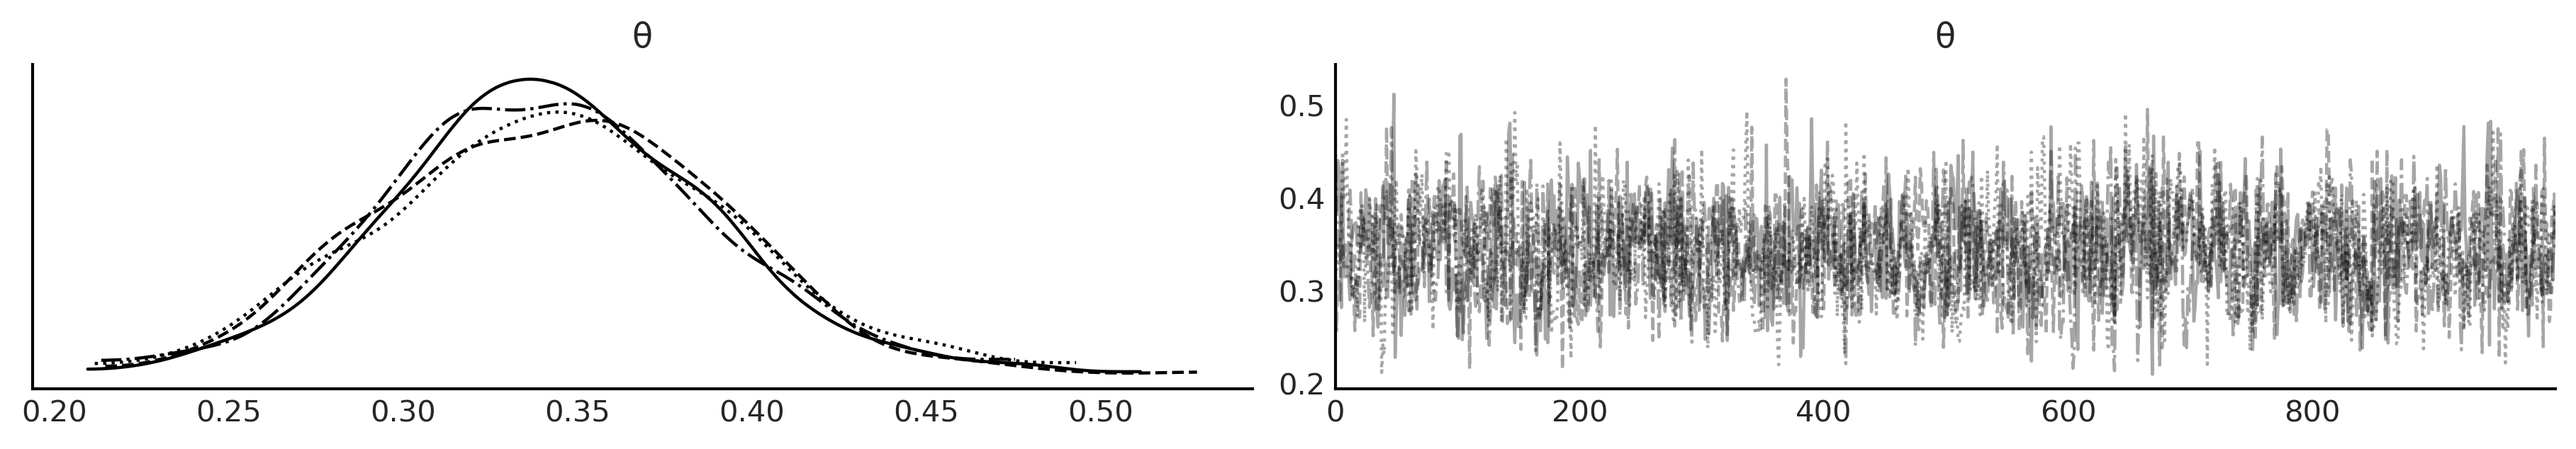

In [37]:
az.plot_trace(idata)

array([[<Axes: title={'center': 'θ'}>,
        <Axes: title={'center': 'θ'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

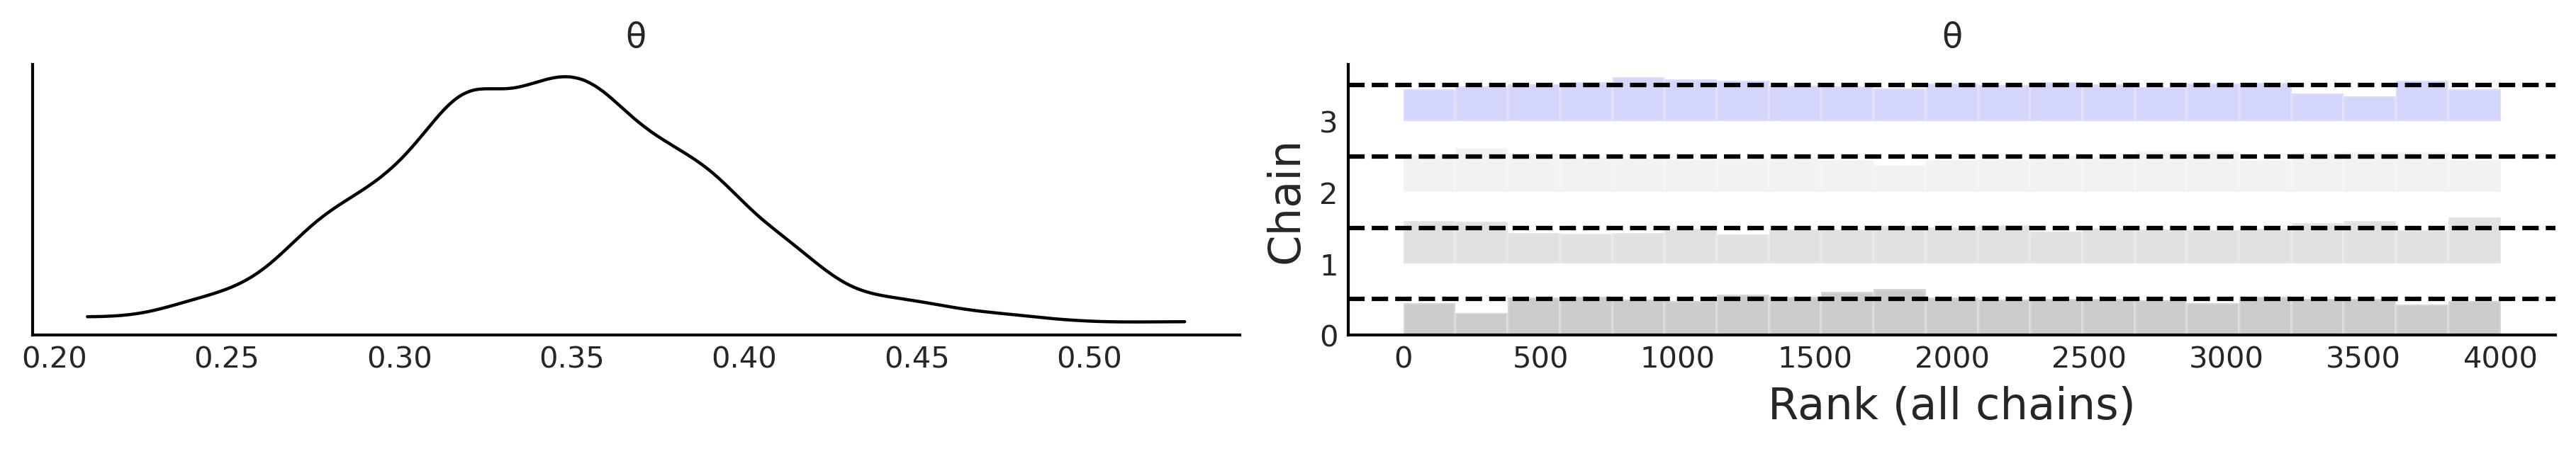

In [38]:
az.plot_trace(idata, kind="rank_bars", combined=True)

In [39]:
az.summary(idata, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
θ,0.34,0.05,0.25,0.43


<Axes: title={'center': 'θ'}>

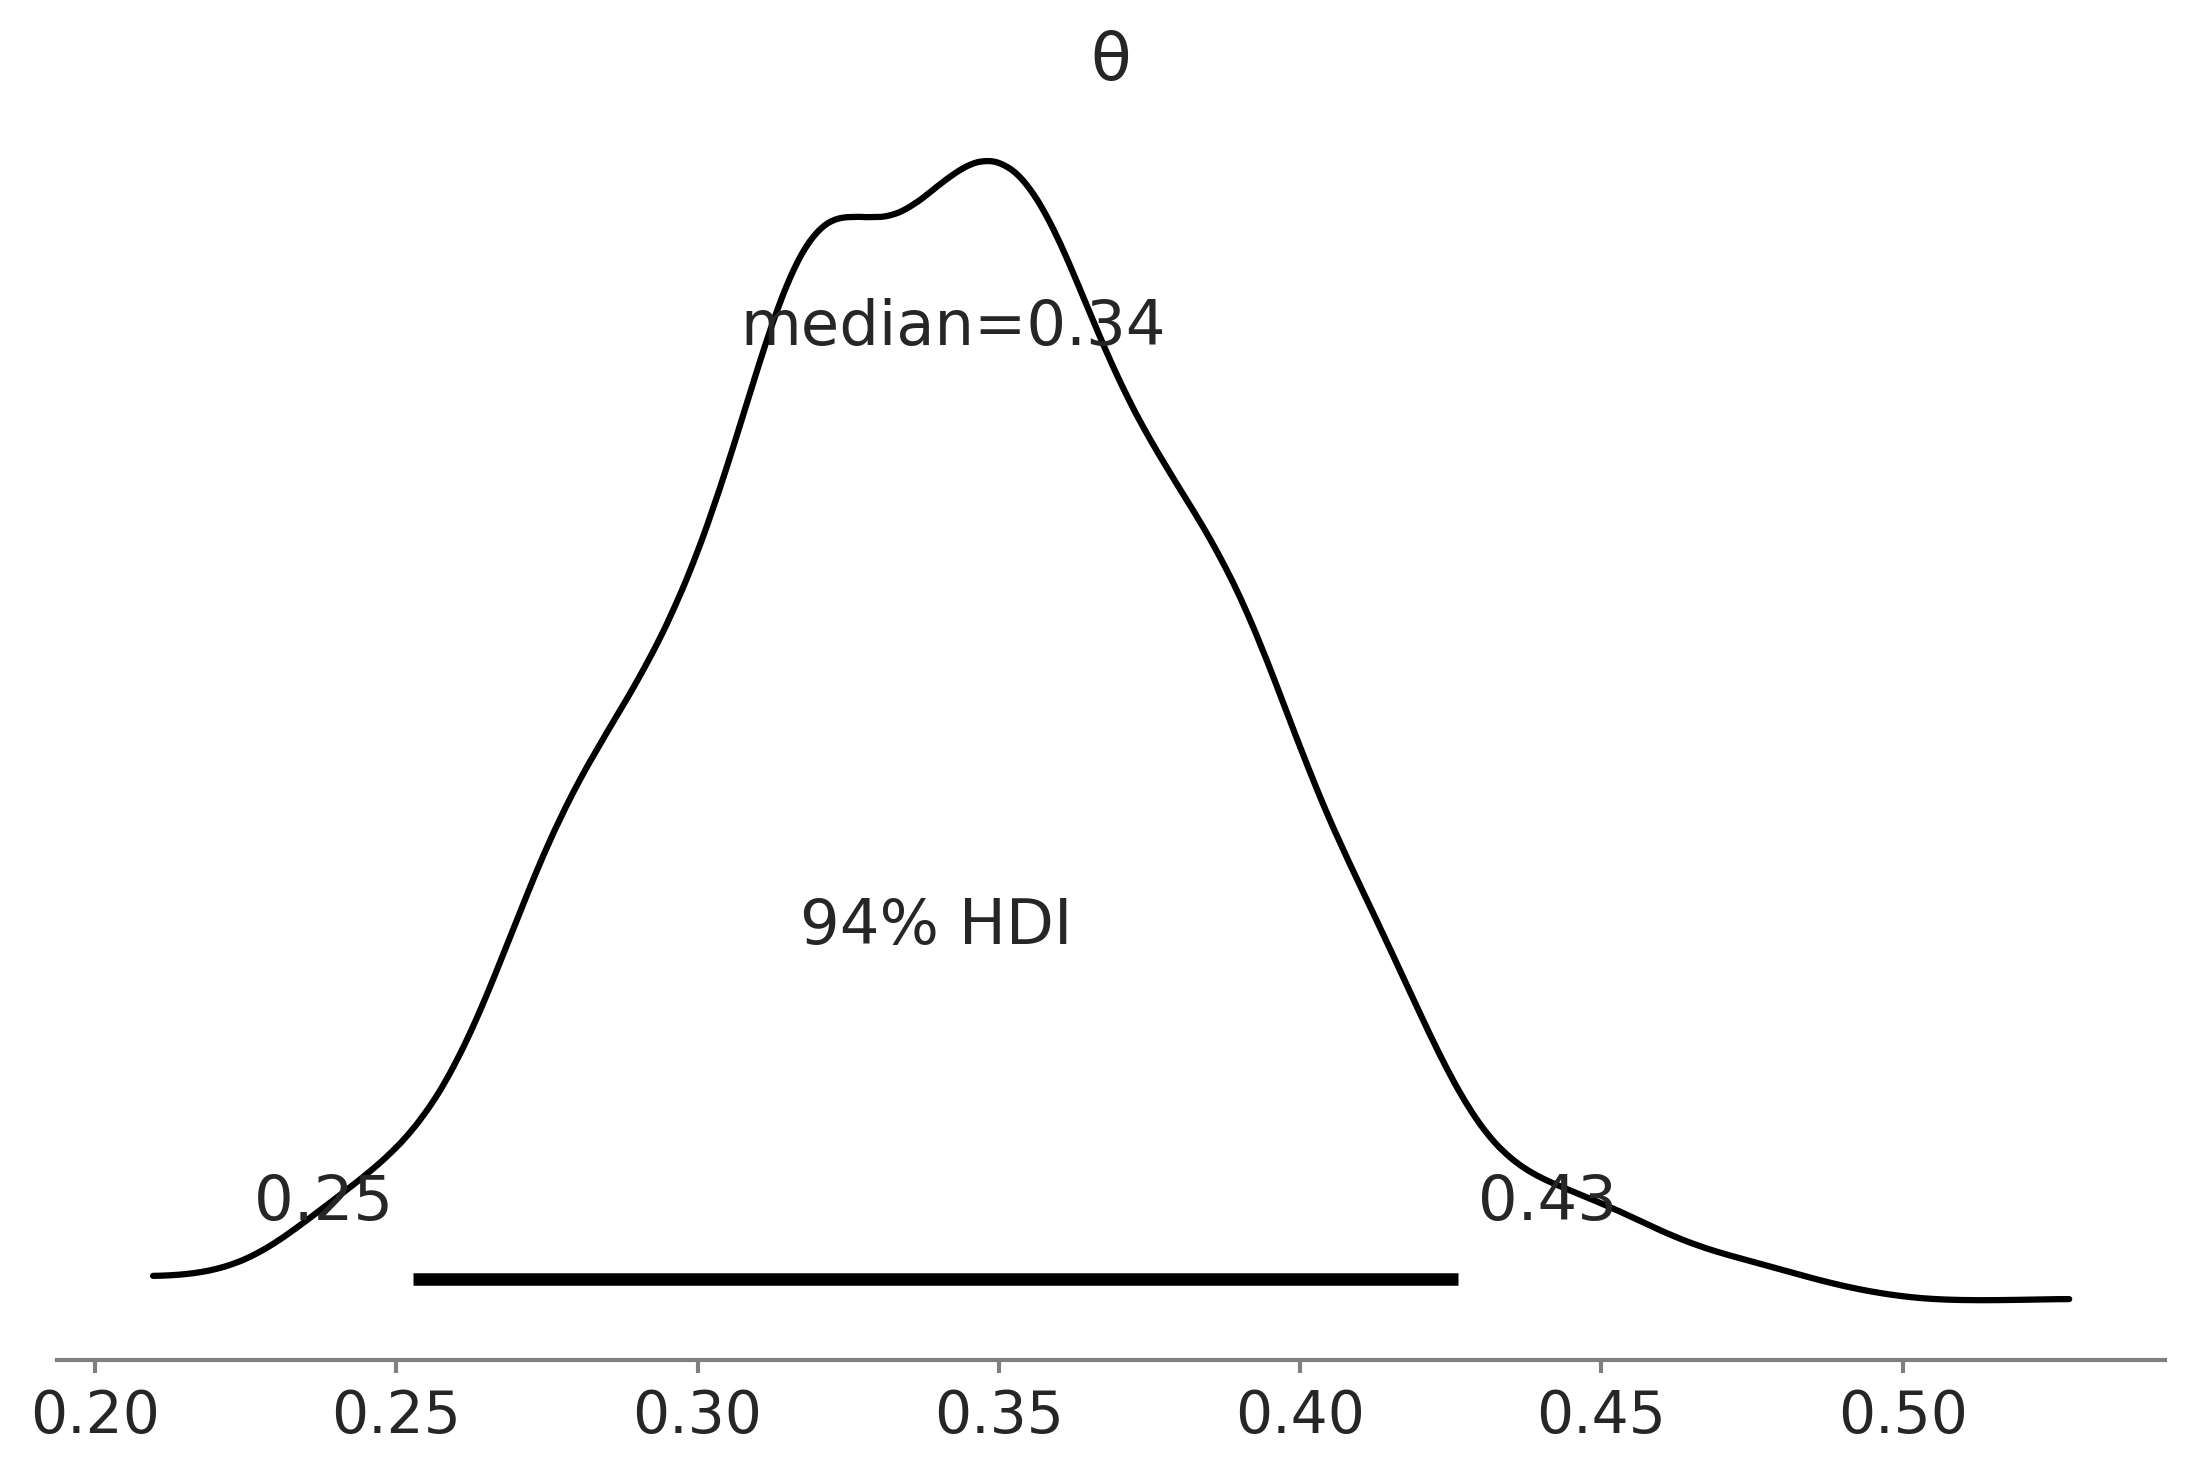

In [40]:
az.plot_posterior(idata, point_estimate="median", hdi_prob=.94)

({'BF10': 20.294457132885256, 'BF01': 0.04927453804022154},
 <Axes: title={'center': 'The BF_10 is 20.29\nThe BF_01 is 0.05'}, xlabel='θ', ylabel='Density'>)

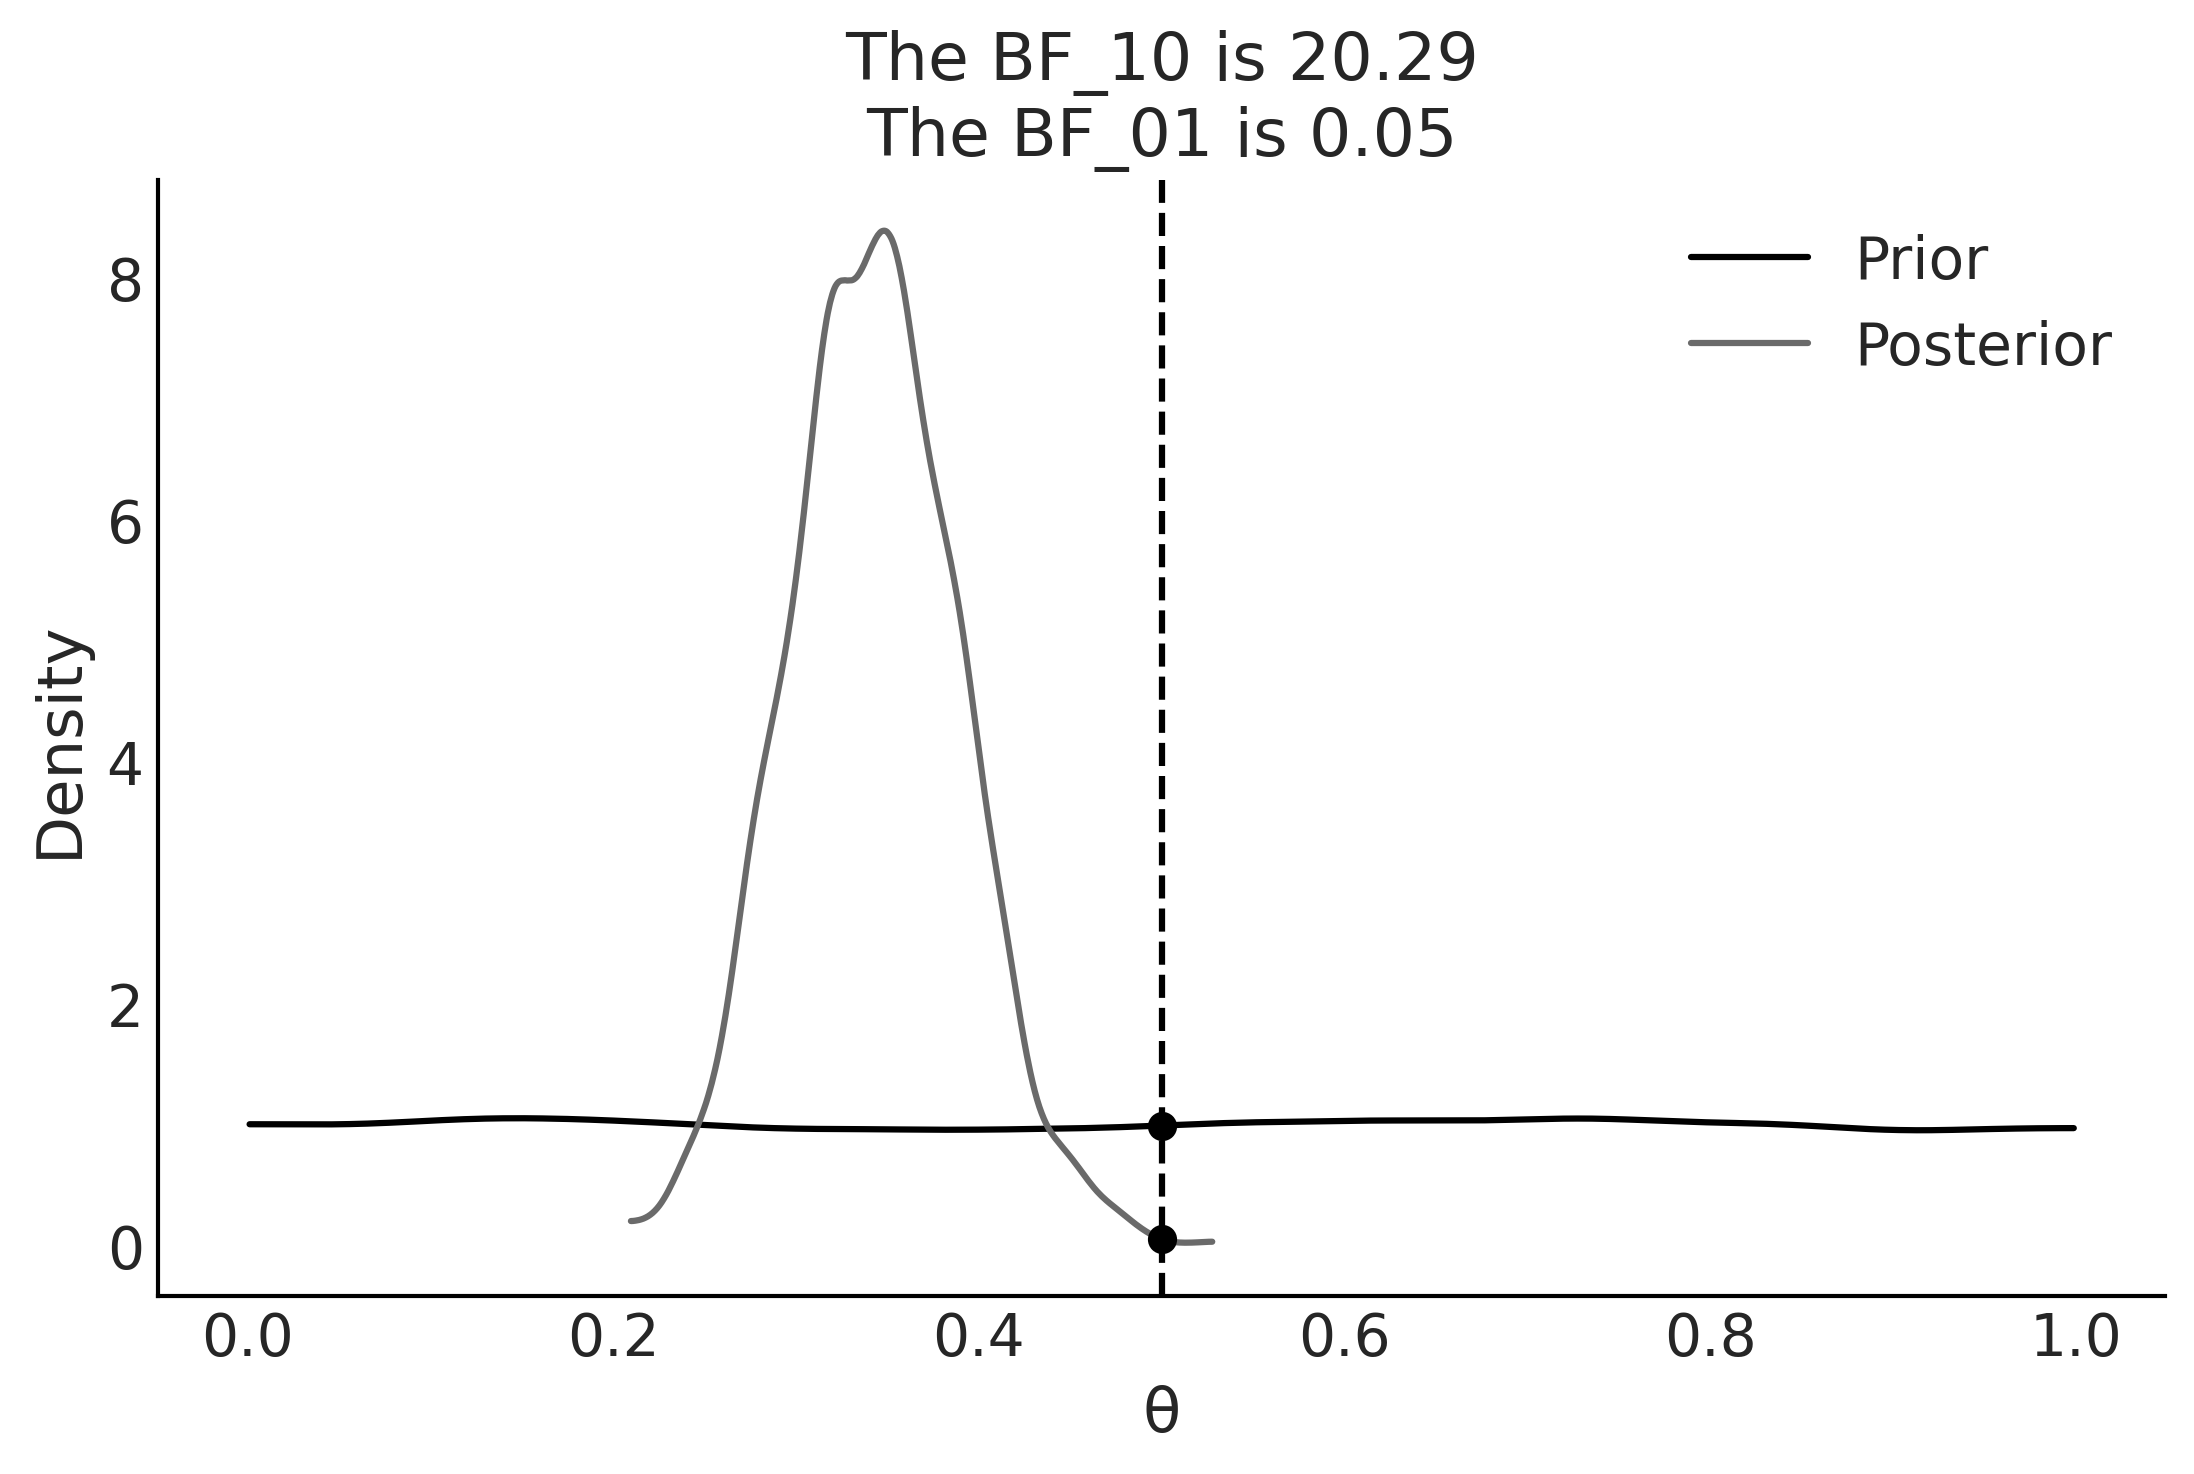

In [41]:
az.plot_bf(idata, var_name="θ",
           prior=np.random.uniform(0, 1, 10_000), ref_val=0.5)

<Axes: title={'center': 'θ'}>

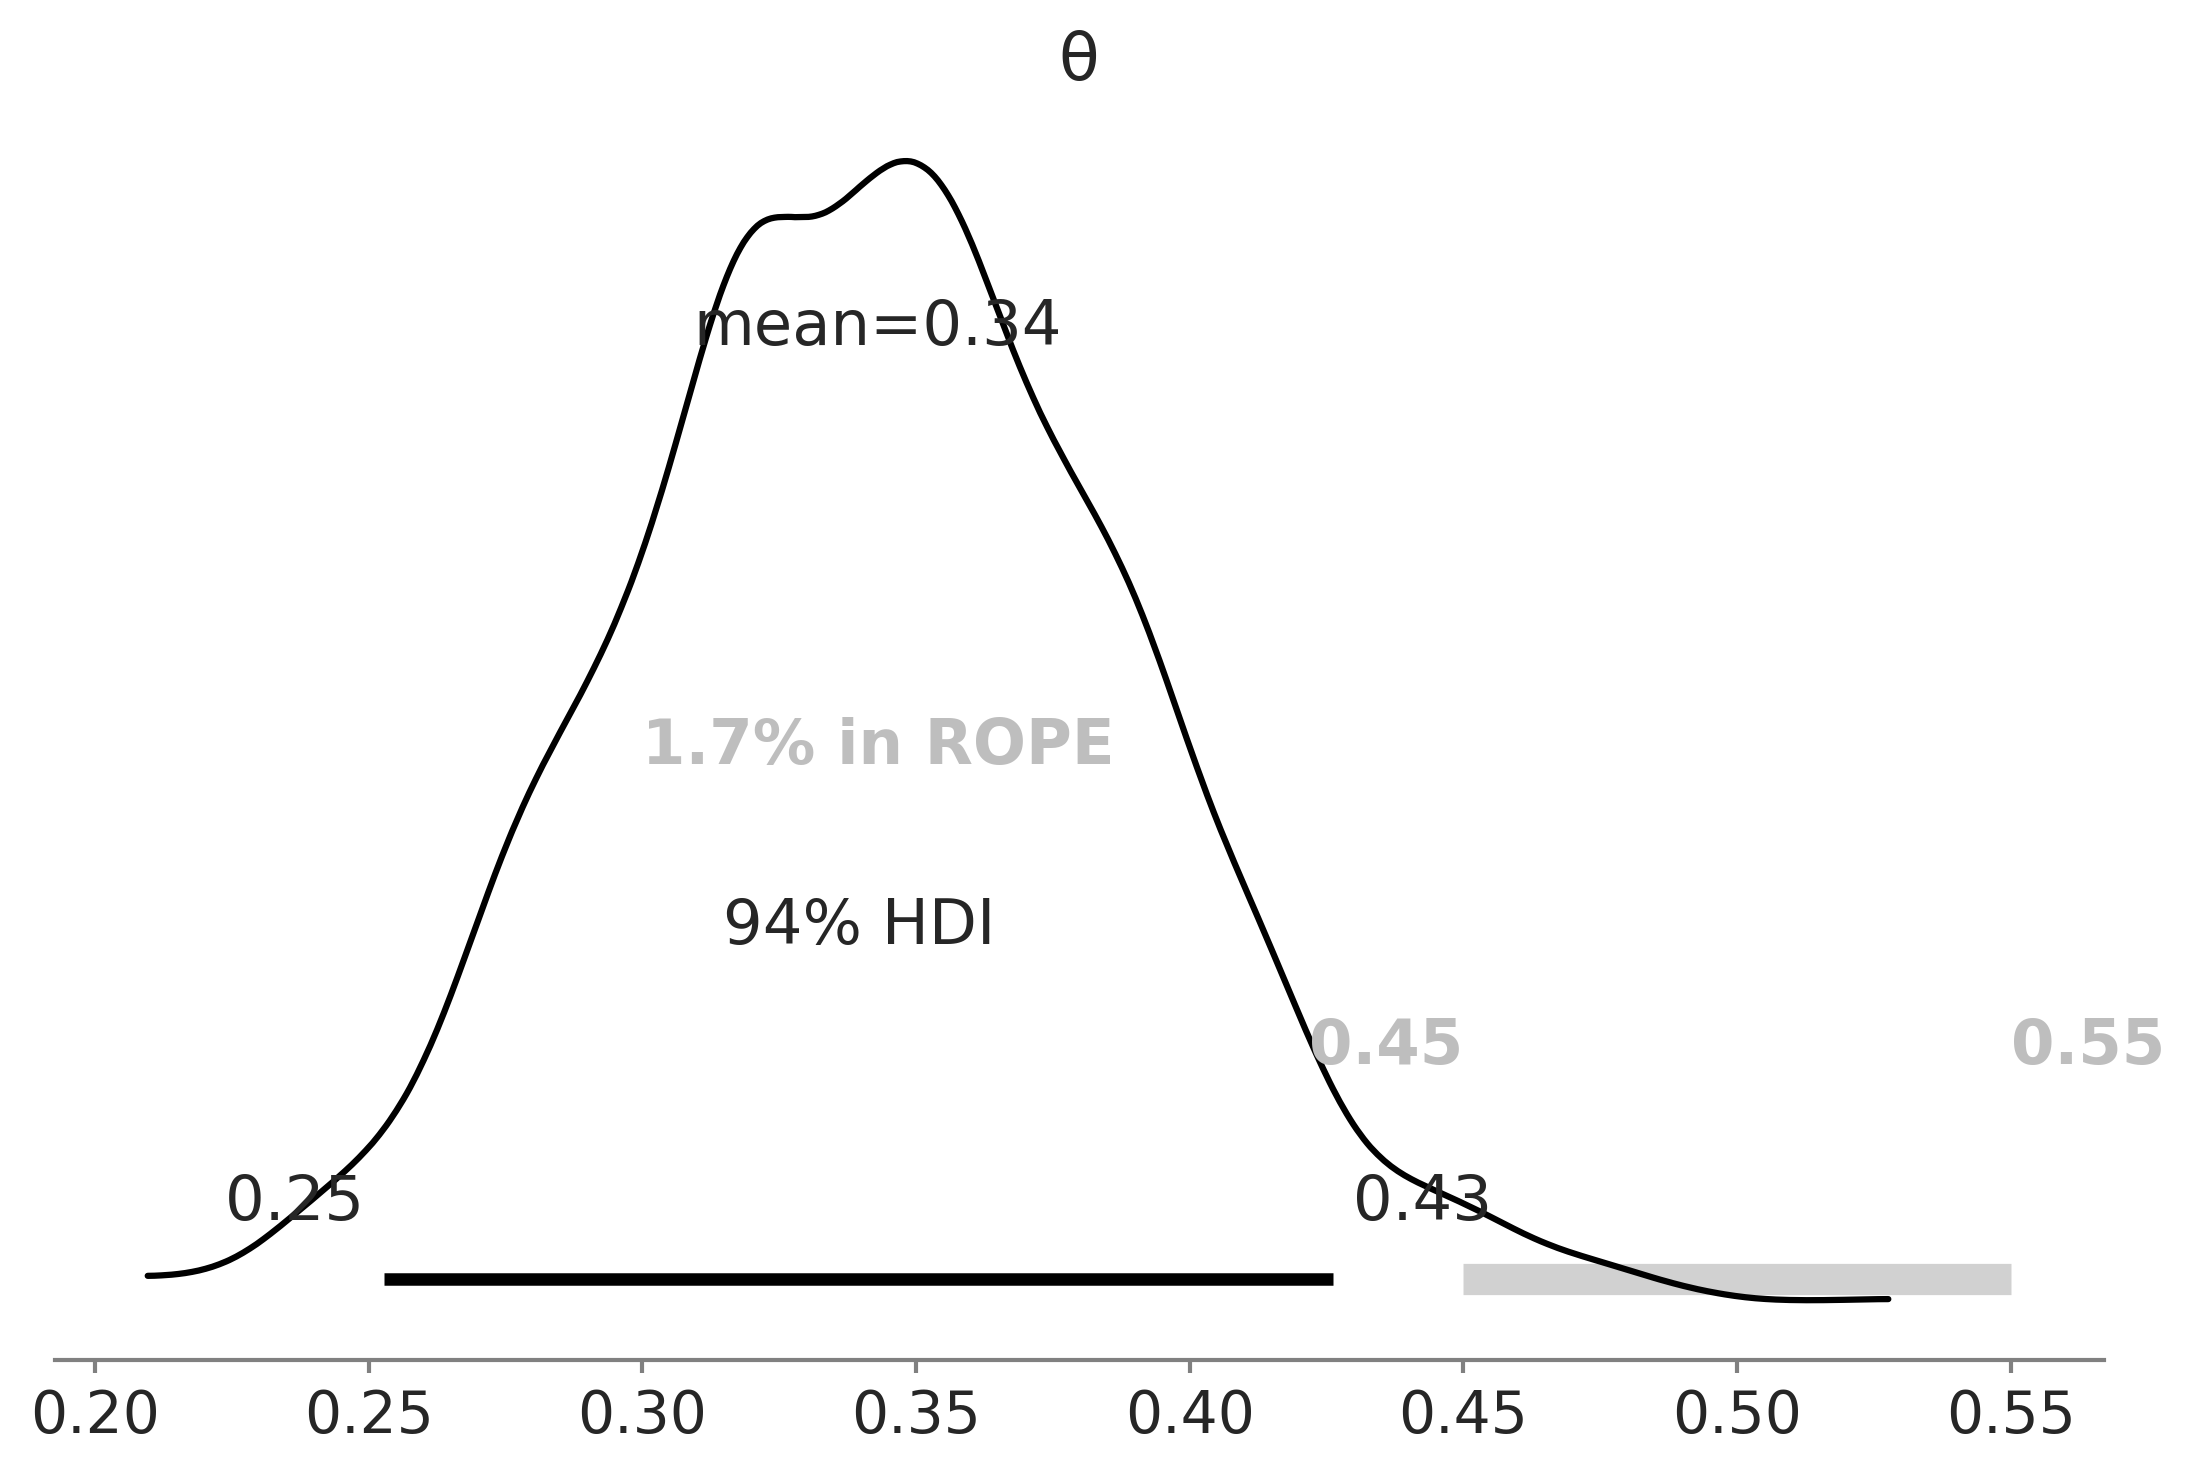

In [42]:
az.plot_posterior(idata, rope=[0.45, 0.55])

<Axes: title={'center': 'θ'}>

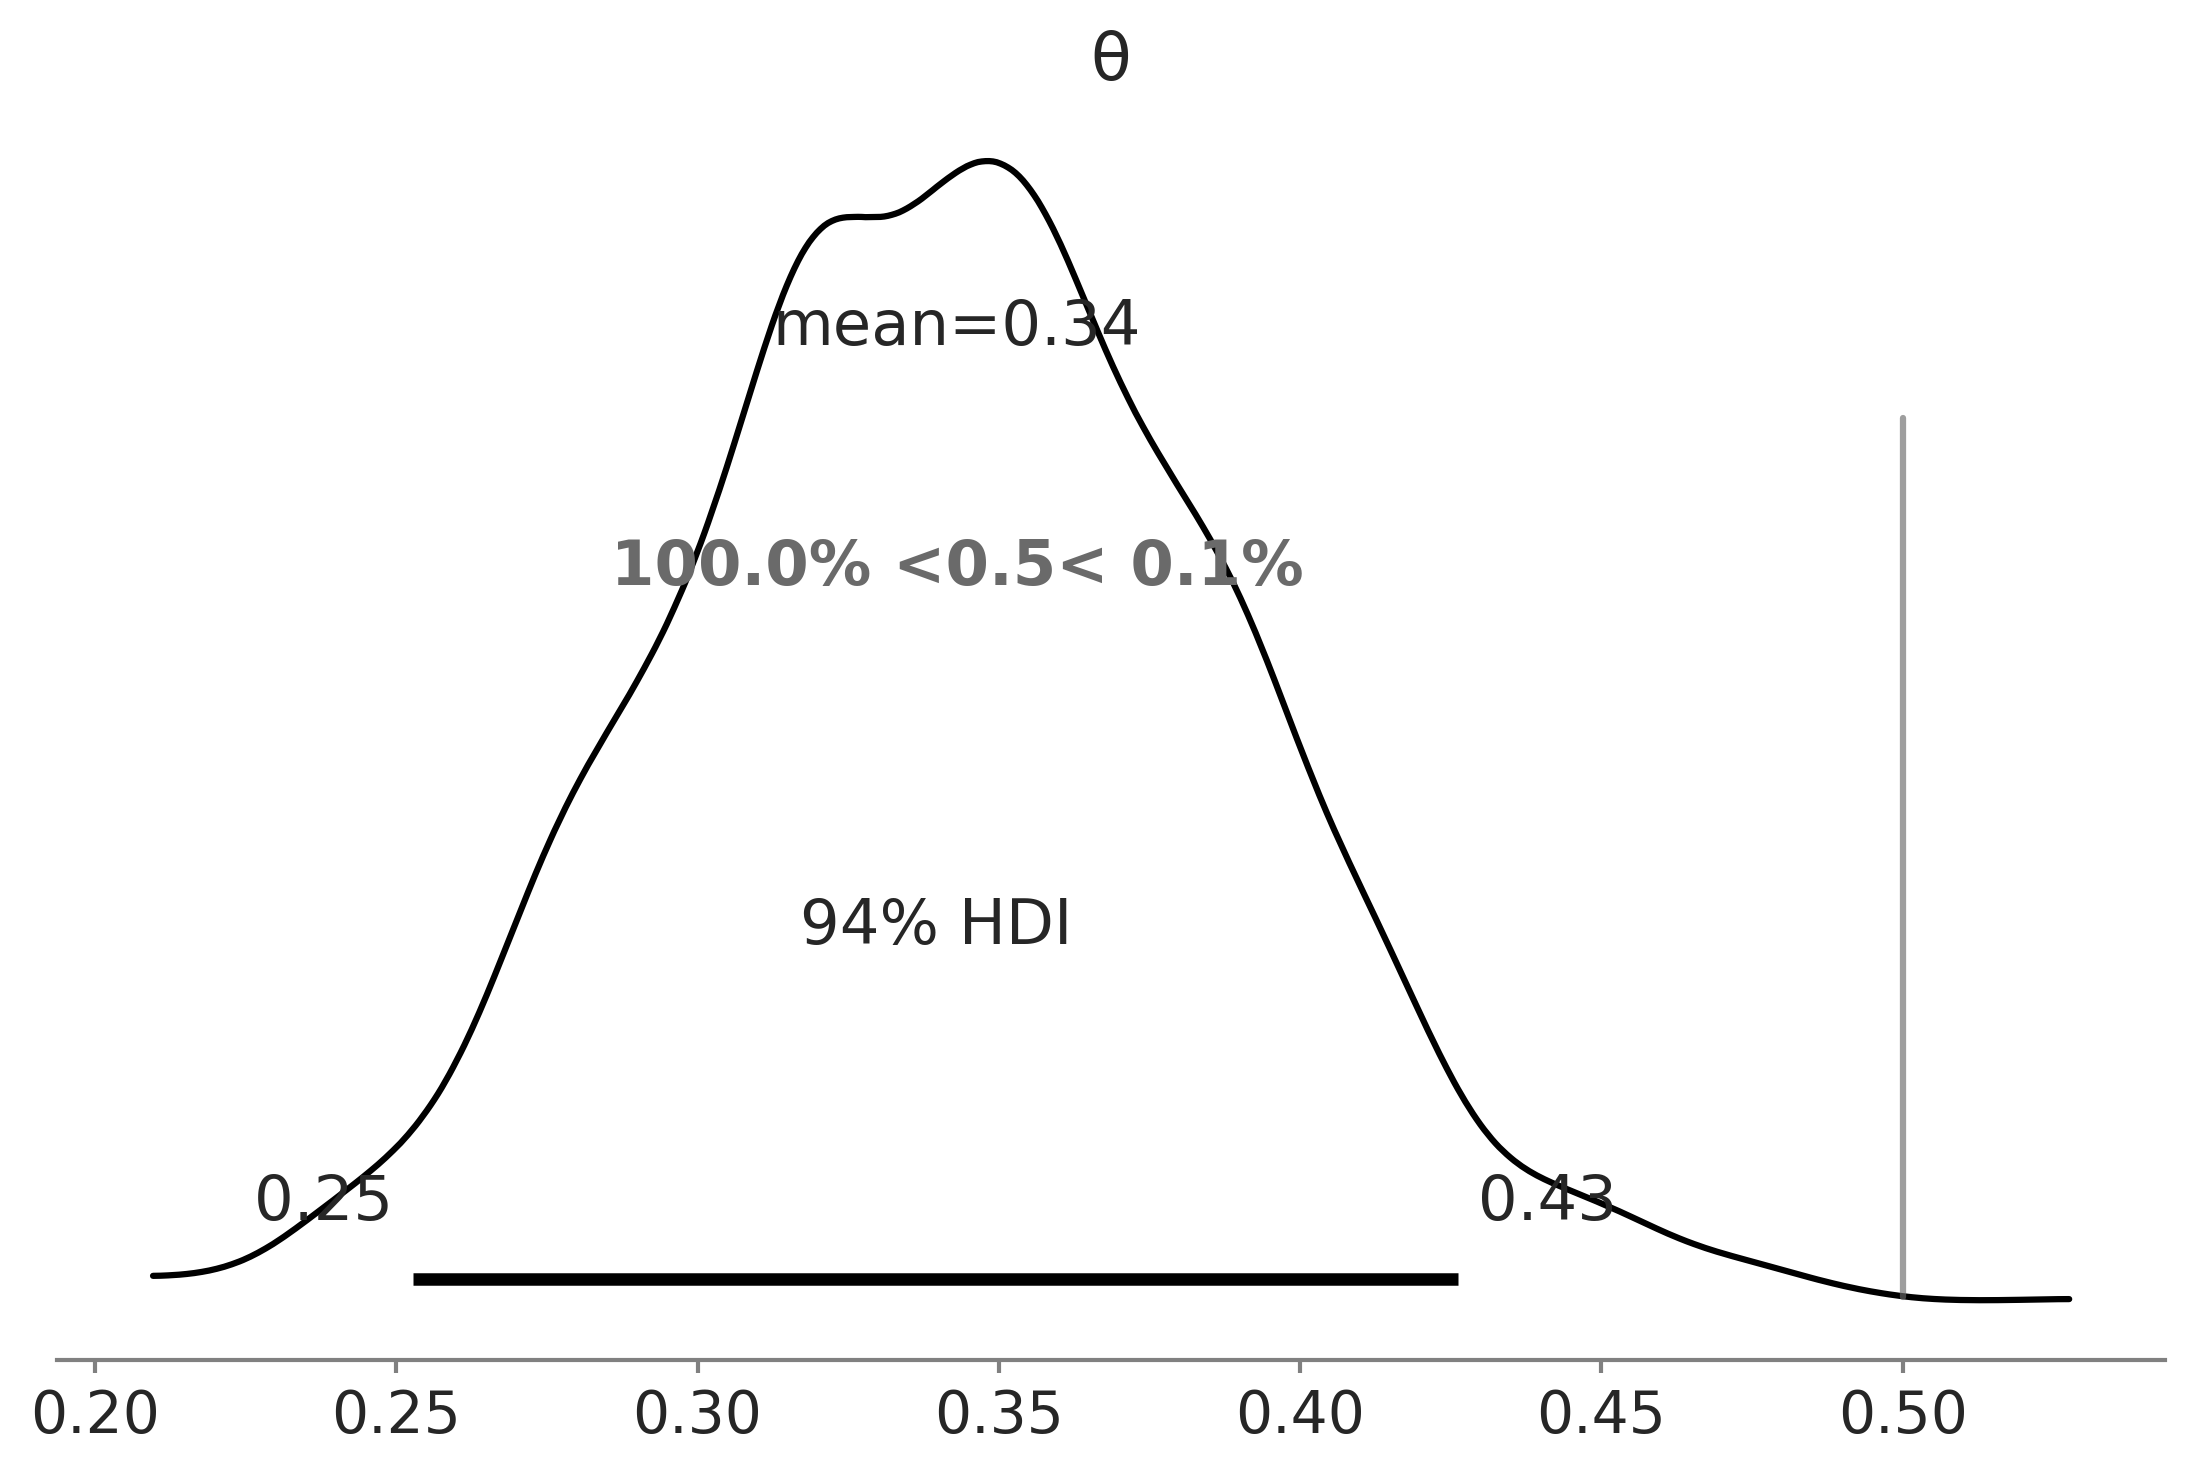

In [43]:
az.plot_posterior(idata, ref_val=0.5)

In [46]:
grid = np.linspace(0, 1, 200)
θ_pos = idata.posterior["θ"]
lossf_a = [np.mean(abs(i - θ_pos)) for i in grid]
lossf_b = [np.mean((i - θ_pos)**2) for i in grid]
print(grid[np.argmin(lossf_a)])
print(grid[np.argmin(lossf_b)])

0.3417085427135678
0.3417085427135678


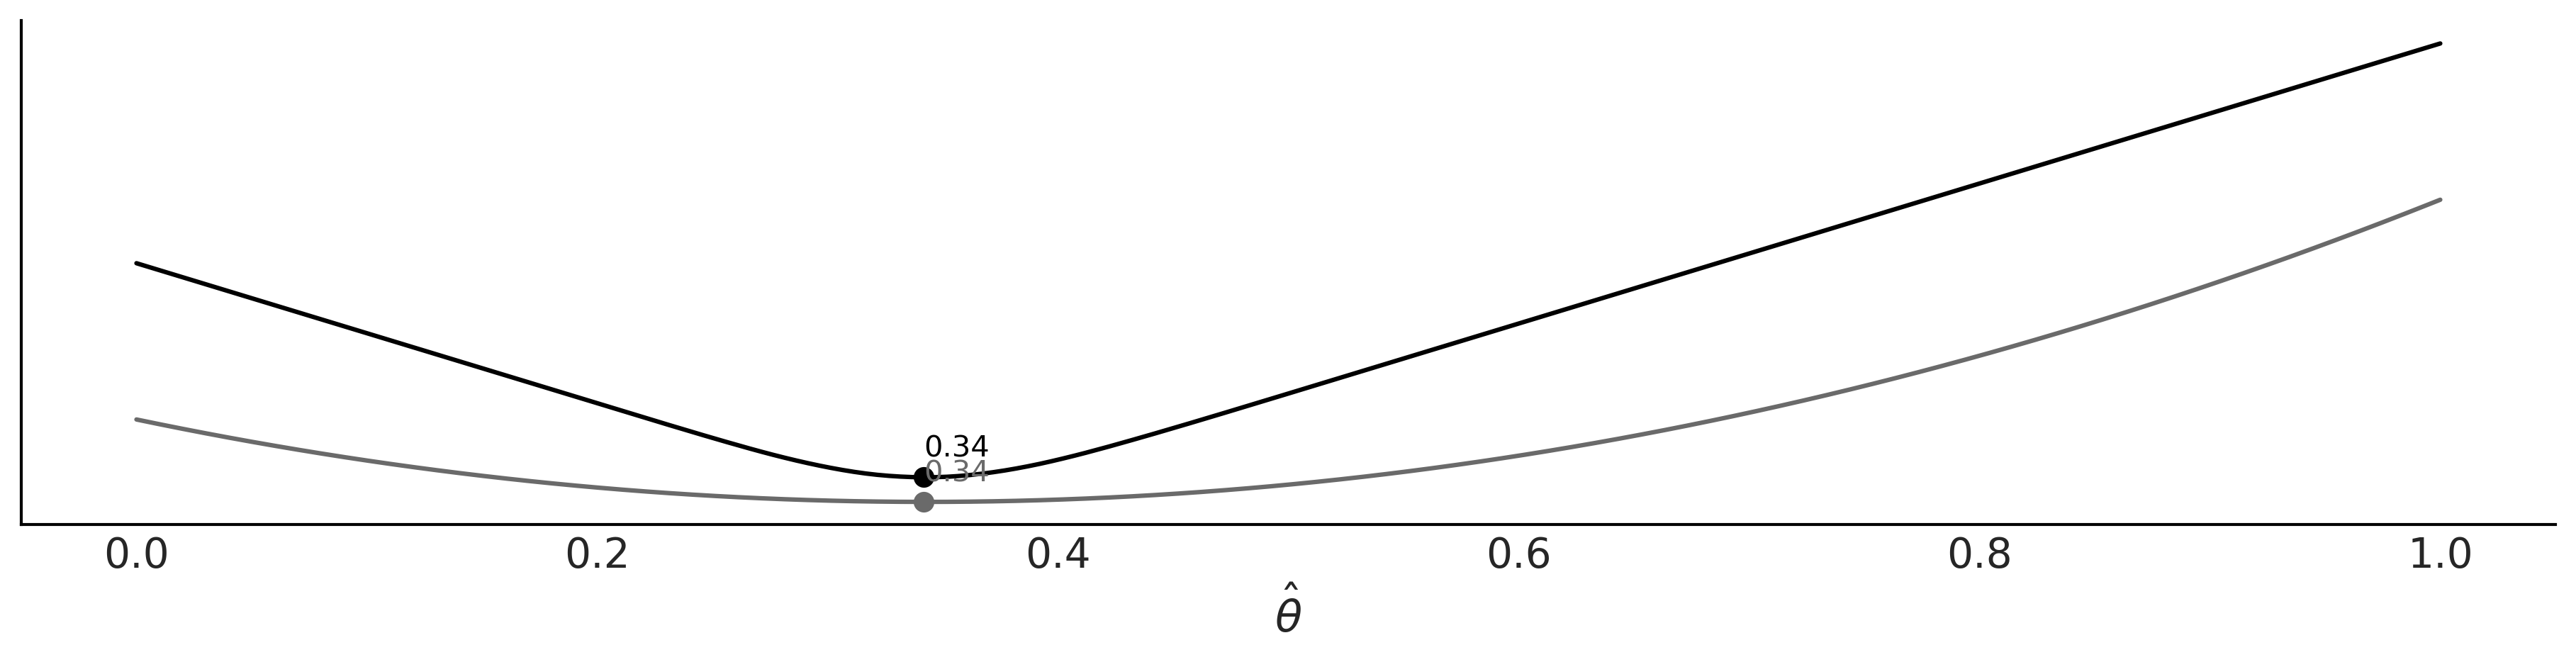

In [64]:
grid = np.linspace(0, 1, 200)
θ_pos = idata.posterior['θ']
lossf_a = [np.mean(abs(i - θ_pos)) for i in grid]
lossf_b = [np.mean((i - θ_pos)**2) for i in grid]
_, ax = plt.subplots(figsize=(12, 3))
for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    ax.plot(grid, lossf, c)
    ax.plot(grid[mini], lossf[mini], 'o', color=c)
    ax.annotate('{:.2f}'.format(grid[mini]),
    (grid[mini], lossf[mini] + 0.03), color=c)

    ax.set_yticks([])
    ax.set_xlabel(r'$\hat \theta$')